In [ ]:
import numpy as np
import cv2
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [ ]:
TRAIN_FAIL_PATH = "/Fail-Train/*.jpg"
TRAIN_NORMAL_PATH = "sls/Normal-Train/*.jpg"
TEST_FAIL_PATH = "sls/Fail-Test/*.jpg"
TEST_NORMAL_PATH = "sls/Normal-Test/*.jpg"
ONE_IMAGE_PATH = "sls/Normal-Test/MyRecord2021-11-19T101958061.avi-img-2040.jpg"
ONE_IMAGE_PATH_FAIL = "sls/Fail-Test/MyRecord2021-11-19T125431028-from_00_49_00.00.mp4-img-198.jpg"
ONE_IMAGE_PATH_NORMAL = "sls/Normal-Train/MyRecord2021-11-19T101958061.avi-img-365.jpg"

In [ ]:
def cluster_and_arrange_image(img):
    X = img.reshape(-1,3)
    print(X.shape)
    km = KMeans(n_clusters=5).fit(X)
    means = np.mean(km.cluster_centers_, axis=1)
    print(means)
    sorted_means = np.sort(means)
    print(sorted_means)
    idxs = []
    for i in range(0,5):
        for j in range(0,5):
            if sorted_means[i] == means[j]:
                idxs.append(j)
                break
    print(idxs)
    segmented_arranged_img = []
    for i in range (0,5):
        cluster = X[km.labels_ == idxs[i]]
        if len(cluster) < 840 :
            ix = idxs[i]
            for i in range(len(cluster), 840):
                cluster = np.append(cluster, km.cluster_centers_[ix:ix + 1], axis=0)
        else:
            cluster = cluster[:840]
        segmented_arranged_img.extend(np.uint8(cluster))
    segmented_arranged_img =  np.asarray(segmented_arranged_img)
    segmented_arranged_img = segmented_arranged_img.reshape(img.shape)
    return segmented_arranged_img

(4200, 3)
[154.15108859 127.50664011 221.49009901 184.73661485 135.45752124]
[127.50664011 135.45752124 154.15108859 184.73661485 221.49009901]
[1, 4, 0, 3, 2]
[[250.6167426  201.22266515   9.94077449]
 [250.87152517 153.63486101   1.80465815]
 [245.40186916 248.88317757 167.1635514 ]
 [244.44223108 105.04581673  33.03187251]
 [250.41561713 231.92443325  67.60957179]]
[153.92672741 135.43701478 220.48286604 127.50664011 183.31654072]
[127.50664011 135.43701478 153.92672741 183.31654072 220.48286604]
[3, 1, 0, 4, 2]
3
4
2


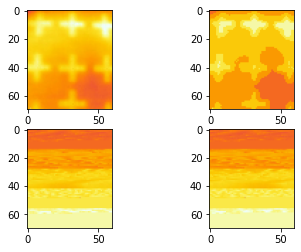

In [ ]:
f, axarr = plt.subplots(2,2)
n_clusters_normal = 5 
n_clusters_fail = 3
# print(ONE_IMAGE_PATH_NORMAL)
## read normal image ### 
# img = cv2.imread(ONE_IMAGE_PATH_NORMAL)
img = plt.imread("/content/sls/Normal-Test/MyRecord2021-11-19T101958061.avi-img-117681.jpg")
img = img[20:300,:,:]
img = cv2.resize(img, (60, 70))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
axarr[0,0].imshow(img)


axarr[1,1].imshow(cluster_and_arrange_image(img))
X = img.reshape(-1,3)

## kmeans ###
km = KMeans(n_clusters=n_clusters_normal).fit(X)
segmented_img = np.uint8(km.cluster_centers_[km.labels_])


segmented_img = segmented_img.reshape(img.shape)


axarr[0,1].imshow(segmented_img)

#####



print(km.cluster_centers_)

means = np.mean(km.cluster_centers_, axis=1)
print(means)
sorted_means = np.sort(means)
print(sorted_means)
ixs = []
for i in range(0,5):
    for j in range(0,5):
        if sorted_means[i] == means[j]:
            ixs.append(j)
            break

print(ixs)

segmented_img_arranged = []
for i in range (0,5):
    cluster = X[km.labels_ == ixs[i]]
  
    if len(cluster) < 840 :
        ix = ixs[i]
        print(ix)
        for i in range(len(cluster), 840):
            cluster = np.append(cluster, km.cluster_centers_[ix:ix + 1], axis=0)
    else:
        cluster = cluster[:840]
    
    segmented_img_arranged.extend(np.uint8(cluster))

segmented_img_arranged = np.asarray(segmented_img_arranged)
segmented_img_arranged = segmented_img_arranged.reshape(img.shape)
axarr[1,0].imshow(segmented_img_arranged)


not anomaly
not anomaly
not anomaly


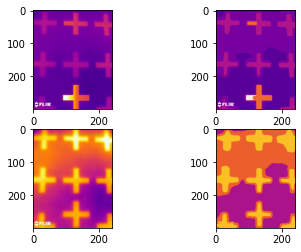

In [ ]:
f, axarr = plt.subplots(2,2)
n_clusters_normal = 5
n_clusters_fail = 3

img = cv2.imread(ONE_IMAGE_PATH)
img = img[20:,:,:]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
X = img.reshape(-1,3)
axarr[0,0].imshow(img)


km = KMeans(n_clusters=n_clusters_normal).fit(X)
segmented_img = np.uint8(km.cluster_centers_[km.labels_])


segmented_img = segmented_img.reshape(img.shape)


axarr[0,1].imshow(segmented_img)

centroids = km.cluster_centers_
clusters = km.labels_

### Read fail image #### 
img_fail = cv2.imread(ONE_IMAGE_PATH_FAIL)
img_fail = img_fail[20:,:,:]
img_fail = cv2.cvtColor(img_fail, cv2.COLOR_BGR2RGB)
X_fail = img_fail.reshape(-1,3)

axarr[1,0].imshow(img_fail)

### Clustering fail image ###  
km_fail = KMeans(n_clusters=n_clusters_fail).fit(X_fail)
segmented_img_fail = np.uint8(km_fail.cluster_centers_[km_fail.labels_])
segmented_img_fail = segmented_img_fail.reshape(img_fail.shape)
axarr[1,1].imshow(segmented_img_fail)


centroids_fail = km_fail.cluster_centers_

#print("dist: " , cdist(centroids_fail, [centroids[0]], 'euclidean'))

points = np.empty((0,len(X[0])), float)
max_distances = np.empty((0,len(X[0])), float)

#### get the maximum distances between the centroids and the instances that belong to this centroid
for i, center_elem in enumerate(centroids):
    # cdist is used to calculate the distance between center and other points
    max_distance = np.max(cdist([center_elem], X[clusters == i], 'euclidean'))
    max_distances = np.append(max_distances, max_distance)   
    points = np.append(points, X[clusters == i], axis=0)

for i, center_elem_fail in enumerate(centroids_fail):
    anomaly = True
    for j, center_elem in enumerate(centroids):
        if max_distances[j] > cdist([center_elem], [center_elem_fail], 'euclidean'):
            anomaly = False
            print("not anomaly")
            break
    if anomaly == True:
        print(center_elem_fail)
        print("anomaly")
        break

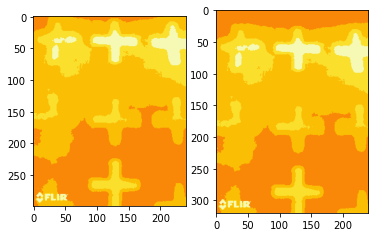

In [ ]:

segmented_img_mod = np.uint8(kmeans.cluster_centers_[labels])
segmented_img_mod = segmented_img_mod.reshape(img.shape)
f, axarr = plt.subplots(1,2)

segmented_img = segmented_img[20:,:,:]
axarr[0].imshow(segmented_img)
axarr[1].imshow(segmented_img_mod)

